In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/drive/My Drive/Sentiment Analysis/IMDB Dataset.csv")

In [4]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'Positive', 0: 'Negative'}) 

In [6]:
vc_df

,Sentiment,Count
0,NaN,25000
1,NaN,25000


In [7]:
#remove punctuations
punctuation_signs = list("?:!.,;")                              
df['review_processed'] = df['review']

for punct_sign in punctuation_signs:
    df['review_processed'] = df['review_processed'].str.replace(punct_sign, '')

In [8]:
df.head(10)

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production <br /><br />The ...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o...",positive,Probably my all-time favorite movie a story of...
6,I sure would like to see a resurrection of a u...,positive,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,This show was an amazing fresh & innovative id...
8,Encouraged by the positive comments about this...,negative,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,If you like original gut wrenching laughter yo...


In [9]:
#removing stop words
import nltk

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
stop_words = list(stopwords.words('english'))
add_words = ['movie','film','one','make','even']
stop_words.extend(add_words)

In [38]:
for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['review_processed'] = df['review_processed'].str.replace(regex_stopword, '')

In [39]:
df.head(10)

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch episode hook right exa...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production technique unassum...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful spend time summer weekend cond...
3,Basically there's a family where a little boy ...,negative,basically family little jake think zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,probably -time favorite story selflessness sa...
6,I sure would like to see a resurrection of a u...,positive,sure would like resurrection date seahunt seri...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea first firs...
8,Encouraged by the positive comments about this...,negative,encourage positive comment look forward watch...
9,If you like original gut wrenching laughter yo...,positive,like original wrench laughter like young love...


In [40]:
# Replacing short words
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if (len(w)>3 or w==" <br /><br />")]))

In [41]:
df.head(10)

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch episode hook right exac...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production technique unassumi...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful spend time summer weekend cond...
3,Basically there's a family where a little boy ...,negative,basically family little jake think zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,probably -time favorite story selflessness sac...
6,I sure would like to see a resurrection of a u...,positive,sure would like resurrection date seahunt seri...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea first first...
8,Encouraged by the positive comments about this...,negative,encourage positive comment look forward watch ...
9,If you like original gut wrenching laughter yo...,positive,like original wrench laughter like young love ...


In [42]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [43]:
df.head(10)

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch episode hook right exac...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production technique unassumi...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful spend time summer weekend cond...
3,Basically there's a family where a little boy ...,negative,basically family little jake think zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,probably -time favorite story selflessness sac...
6,I sure would like to see a resurrection of a u...,positive,sure would like resurrection date seahunt seri...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea first first...
8,Encouraged by the positive comments about this...,negative,encourage positive comment look forward watch ...
9,If you like original gut wrenching laughter yo...,positive,like original wrench laughter like young love ...


In [44]:
from nltk.stem import WordNetLemmatizer

In [45]:
#Lemmatization

nltk.download('punkt')
nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [46]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    lemmatized_text = lemmatize_sentence(df.loc[row]['review_processed'])
    lemmatized_text_list.append(lemmatized_text)

df['review_processed'] = lemmatized_text_list

In [47]:
df.head(10)

,review,sentiment,review_processed
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch episode hook right exac...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production technique unassumi...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful spend time summer weekend cond...
3,Basically there's a family where a little boy ...,negative,basically family little jake think zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",positive,probably -time favorite story selflessness sac...
6,I sure would like to see a resurrection of a u...,positive,sure would like resurrection date seahunt seri...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea first first...
8,Encouraged by the positive comments about this...,negative,encourage positive comment look forward watch ...
9,If you like original gut wrenching laughter yo...,positive,like original wrench laughter like young love ...


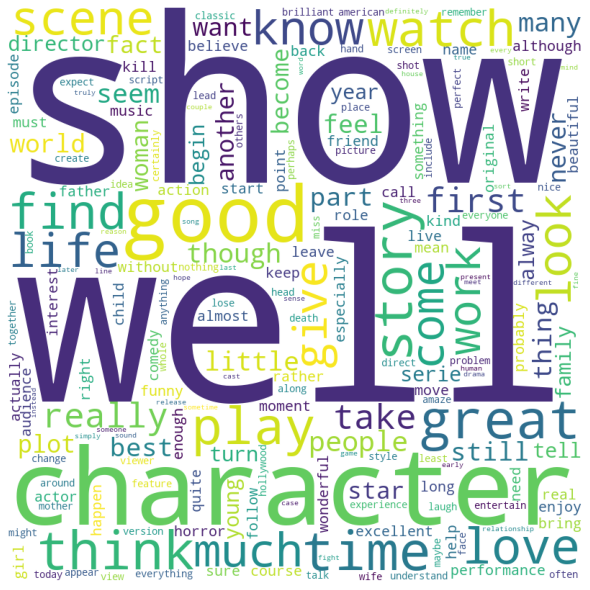

In [49]:
## Bilding a Word Cloud
 
from wordcloud import WordCloud
word_cloud_df = df[df['sentiment'] == "positive"]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating sparse matrix of top 2500 tokens
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(df.review_processed).toarray()
y = df.sentiment.values

In [51]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [52]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
# Testing the model on test set
y_pred = classifier.predict(X_test)

In [54]:
#Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[4304  731]
 [1706 3259]]
The model accuracy is 0.7563


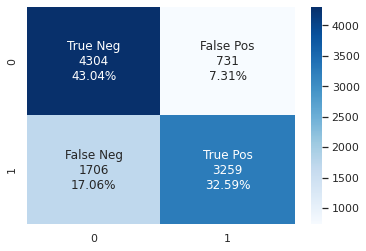

In [59]:
#confusion matrix
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [61]:
import pickle
with open('/content/drive/My Drive/Sentiment Analysis/model.pickle', 'wb') as output:
    pickle.dump(classifier, output)